作者：董汇标MINUS 知乎专栏地址：https://zhuanlan.zhihu.com/p/97217536

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
luohu_data = pd.read_csv('./bj_luohu.csv', index_col = 'id')
luohu_data.head(5)

,name,birthday,company,score
id,,,,
1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59
2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25
3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96
4,杨静,1975-07,中科专利商标代理有限责任公司,118.21
5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79


In [3]:
company_data = luohu_data.groupby('company', as_index=False).count()[['company', 'name']]
company_data.rename(columns={'name':'人数'}, inplace=True)      # 替换 1
company_data.rename(columns={'company':'公司名'},inplace=True)  # 替换 2
company_data.head(20)

,公司名,人数
0,ABB（中国）有限公司,8
1,BONNIER图书文化（北京）有限公司,1
2,IGT科技开发（北京）有限公司,1
3,POLYCOM通讯技术（北京）有限公司,2
4,VIDIA技术服务（北京）有限公司,1
5,《中国企业报》股份有限公司,2
6,《中国当代医药》杂志社有限公司,1
7,《中国汽车报》社有限公司,1
8,《中国烟草》杂志社有限公司,1
9,《中国经济周刊》杂志社,1


In [4]:
company_sorted_data = company_data.sort_values('人数', ascending=False)
company_sorted_data.head(15)   # 前15

,公司名,人数
1081,北京华为数字技术有限公司,137
312,中央电视台,73
2457,北京首钢建设集团有限公司,57
3082,百度在线网络技术（北京）有限公司,55
3194,联想（北京）有限公司,48
214,中国民生银行股份有限公司,40
2648,国际商业机器（中国）投资有限公司,39
1334,北京外企人力资源服务有限公司,39
174,中国国际技术智力合作有限公司,29
2514,华为技术有限公司北京研究所,27


In [5]:
cut_bins = np.arange(90, 130, 5)   #分段设置
bins = pd.cut(luohu_data['score'], cut_bins)  # 将落户数据，按照cutbins来切一下
bin_counts = luohu_data['score'].groupby(bins).count()
bin_counts.head(10)

score
(90, 95]      3344
(95, 100]     1757
(100, 105]     653
(105, 110]     218
(110, 115]      32
(115, 120]      13
(120, 125]       2
Name: score, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


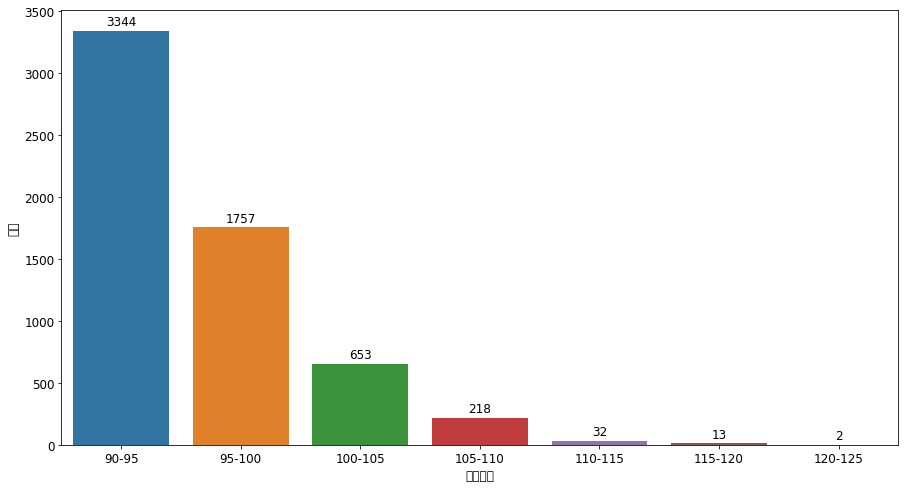

In [6]:
plt.figure(figsize=(15,8))
plt.rcParams['font.family']='Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size']=12

x_name=['90-95','95-100','100-105','105-110','110-115','115-120','120-125']
sns.barplot(x_name,bin_counts)
plt.ylabel('人数')
plt.xlabel('分数区间')

for x, y in zip(range(7), bin_counts):
    plt.text(x, y+20 , y, ha='center', va='bottom')

plt.show()

In [7]:
luohu_data['age'] = (pd.to_datetime('2018-07') - pd.to_datetime(luohu_data['birthday'])) / pd.Timedelta('365 days')
luohu_data.describe()
#luohu_data['score'].mean() >95

,score,age
count,6019.000000,6019.000000
mean,95.654552,41.960493
std,4.354445,2.814382
min,90.750000,32.852055
25%,92.330000,40.027397
50%,94.460000,41.942466
75%,97.750000,43.945205
max,122.590000,60.041096


In [8]:
mean=luohu_data['age'].mean()
std =luohu_data['age'].std()

# 得到上下限
lower , upper =mean -3*std , mean+3*std

print('均值',mean) 
print('标准差',std) 
print('下限',lower) 
print('上限',upper)

均值 41.960493141581246
标准差 2.814381679708802
下限 33.51734810245484
上限 50.40363818070765


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


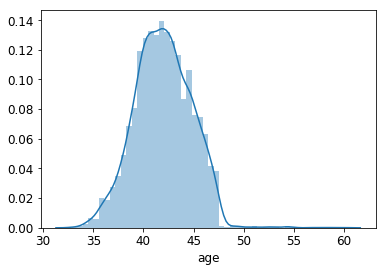

In [9]:
#fig.set_size_inches(15,5)   # 设置画布大小
sns.distplot(luohu_data['age'])  

本文微信首发于公众号【凹凸玩数据】欢迎关注查看更多更好玩的文章！

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://dwz.cn/UqFdLPQQ")